In [1]:
# This notebook analyses the ouput of 
# running complexity.py

# grep 'for_parser:' complexity_PM.txt | sed 's/for_parser:,//g' | sed '1 i\cityname,i_o_length,prediction_horizon,grid_size,thresh,cx_sample_whole_data,cx_sample_single_point,CSR_PM_frac, CSR_PM_count'
# The above shell must be run and saved to PM.csvCSR_PM_frac

In [2]:
import sys

sys.path.append("../")
import config

import numpy as np
import matplotlib.pyplot as plt
from smartprint import smartprint as sprint

In [5]:
import pandas as pd
df = pd.read_csv("PM_cont.csv")

city_color = {"london" : "red", 
             "melbourne": "blue",
             "madrid": "green"}
df.head()

,cityname,i_o_length,prediction_horizon,grid_size,thresh,cx_sample_whole_data,cx_sample_single_point,CSR_PM_frac,CSR_PM_count,CSR_PM_no_thresh_median,CSR_PM_no_thresh_mean
0,london,1,1,45,500,800,200,0.02250,18,915.0,1002.914185
1,london,1,2,45,500,800,200,0.03375,27,943.0,1021.313754
2,london,1,3,45,500,800,200,0.05250,42,994.0,1055.226453
3,london,1,4,45,500,800,200,0.05375,43,1040.0,1093.491216
4,london,1,5,45,500,800,200,0.05500,44,1062.0,1115.977845


In [ ]:
thresh = 1500

# scales
for thresh in [300, 500, 750, 1000, 1250, 1500]:
    for city in config.city_list:

        cityname = city.lower()

        city_label_printed = []

        for scale in config.scales:
            for i_o_length in config.i_o_lengths_def:
                for pred_horiz in config.pred_horiz_def:
                    filtered_rows = df[    \
                                       (df["i_o_length"]==i_o_length) & \
                                       (df["grid_size"]==scale) & \
                                       (df["prediction_horizon"]==pred_horiz) &\
                                       (df["cityname"]==cityname) &\
                                       (df["thresh"]==thresh)
                                      ]

                    if filtered_rows.shape[0] == 1:
                        range_ = [0]
                    else:
                        range_ = list(range(filtered_rows.shape[0]))
                        sprint (cityname, scale, i_o_length, pred_horiz, filtered_rows.shape)
                        # no worries, will be plotted multiple times # this is three times because of first combination overlap


                    for i in range_:
                        if cityname in city_label_printed:
                            plt.scatter(scale, filtered_rows.iloc[i].CSR_PM_count, color=city_color[cityname])
                        else:
                            plt.scatter(scale, filtered_rows.iloc[i].CSR_PM_count, color=city_color[cityname], label=cityname)
                            city_label_printed.append(cityname)

    plt.title("Thresh: " + str(thresh))
    plt.xlabel("Scale (nXn grids)")
    plt.ylabel("CSR_PM_frac")
    plt.legend()
    plt.show()
                    
                

                

In [ ]:
# io_lengths
for thresh in [300, 500, 750, 1000, 1250, 1500]:
    for city in config.city_list:

        cityname = city.lower()

        city_label_printed = []

        for scale in config.scales_def:
            for i_o_length in config.i_o_lengths:
                for pred_horiz in config.pred_horiz_def:
                    filtered_rows = df[    \
                                       (df["i_o_length"]==i_o_length) & \
                                       (df["grid_size"]==scale) & \
                                       (df["prediction_horizon"]==pred_horiz) &\
                                       (df["cityname"]==cityname) &\
                                       (df["thresh"]==thresh)
                                      ]

                    if filtered_rows.shape[0] == 1:
                        range_ = [0]
                    else:
                        range_ = list(range(filtered_rows.shape[0]))
                        sprint (cityname, scale, i_o_length, pred_horiz, filtered_rows.shape)
                        # no worries, will be plotted multiple times # this is three times because of first combination overlap


                    for i in range_:
                        if cityname in city_label_printed:
                            plt.scatter(i_o_length, filtered_rows.iloc[i].CSR_PM_frac, color=city_color[cityname])
                        else:
                            plt.scatter(i_o_length, filtered_rows.iloc[i].CSR_PM_frac, color=city_color[cityname], label=cityname)
                            city_label_printed.append(cityname)

    plt.title("Thresh: " + str(thresh))
    plt.xlabel("IO length")
    plt.ylabel("CSR_PM_frac")
    plt.legend()
    plt.show()
                    

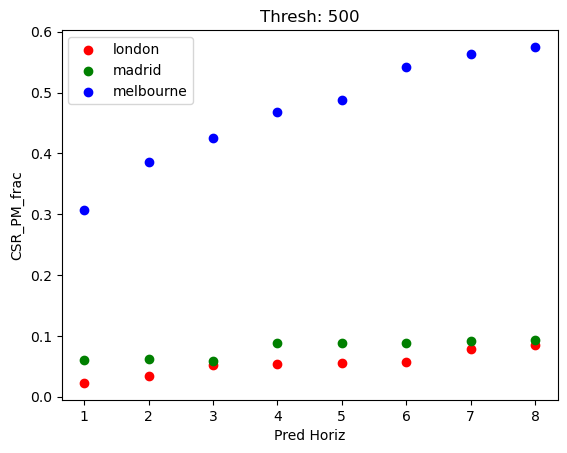

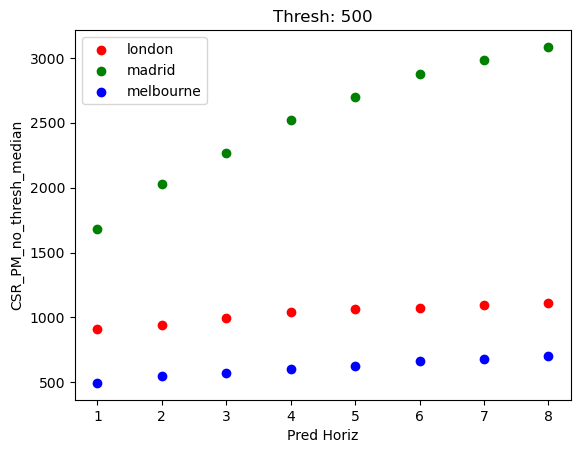

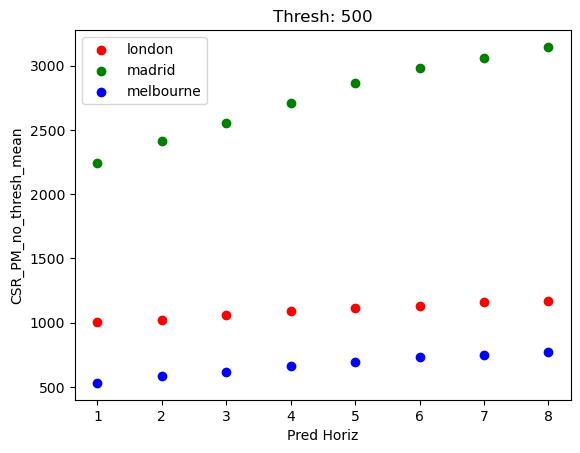

In [8]:
# pred_horiz

for thresh in [500]:
    for city in config.city_list:

        cityname = city.lower()

        city_label_printed = []

        for scale in config.scales_def:
            for i_o_length in config.i_o_lengths_def:
                for pred_horiz in config.pred_horiz:
                    filtered_rows = df[    \
                                       (df["i_o_length"]==i_o_length) & \
                                       (df["grid_size"]==scale) & \
                                       (df["prediction_horizon"]==pred_horiz) &\
                                       (df["cityname"]==cityname) &\
                                       (df["thresh"]==thresh)
                                      ]

                    if filtered_rows.shape[0] == 1:
                        range_ = [0]
                    else:
                        range_ = list(range(filtered_rows.shape[0]))
                        sprint (cityname, scale, i_o_length, pred_horiz, filtered_rows.shape)
                        # no worries, will be plotted multiple times # this is three times because of first combination overlap


                    for i in range_:
                        if cityname in city_label_printed:
                            plt.scatter(pred_horiz, filtered_rows.iloc[i].CSR_PM_frac, color=city_color[cityname])
                        else:
                            plt.scatter(pred_horiz, filtered_rows.iloc[i].CSR_PM_frac, color=city_color[cityname], label=cityname)
                            city_label_printed.append(cityname)

    plt.title("Thresh: " + str(thresh))
    plt.xlabel("Pred Horiz")
    plt.ylabel("CSR_PM_frac")
    plt.legend()
    plt.show()
    
    
for thresh in [500]:
    for city in config.city_list:

        cityname = city.lower()

        city_label_printed = []

        for scale in config.scales_def:
            for i_o_length in config.i_o_lengths_def:
                for pred_horiz in config.pred_horiz:
                    filtered_rows = df[    \
                                       (df["i_o_length"]==i_o_length) & \
                                       (df["grid_size"]==scale) & \
                                       (df["prediction_horizon"]==pred_horiz) &\
                                       (df["cityname"]==cityname) &\
                                       (df["thresh"]==thresh)
                                      ]

                    if filtered_rows.shape[0] == 1:
                        range_ = [0]
                    else:
                        range_ = list(range(filtered_rows.shape[0]))
                        sprint (cityname, scale, i_o_length, pred_horiz, filtered_rows.shape)
                        # no worries, will be plotted multiple times # this is three times because of first combination overlap


                    for i in range_:
                        if cityname in city_label_printed:
                            plt.scatter(pred_horiz, filtered_rows.iloc[i].CSR_PM_no_thresh_median, color=city_color[cityname])
                        else:
                            plt.scatter(pred_horiz, filtered_rows.iloc[i].CSR_PM_no_thresh_median, color=city_color[cityname], label=cityname)
                            city_label_printed.append(cityname)

    plt.title("Thresh: " + str(thresh))
    plt.xlabel("Pred Horiz")
    plt.ylabel("CSR_PM_no_thresh_median")
    plt.legend()
    plt.show()    
                    
        
for thresh in [500]:
    for city in config.city_list:

        cityname = city.lower()

        city_label_printed = []

        for scale in config.scales_def:
            for i_o_length in config.i_o_lengths_def:
                for pred_horiz in config.pred_horiz:
                    filtered_rows = df[    \
                                       (df["i_o_length"]==i_o_length) & \
                                       (df["grid_size"]==scale) & \
                                       (df["prediction_horizon"]==pred_horiz) &\
                                       (df["cityname"]==cityname) &\
                                       (df["thresh"]==thresh)
                                      ]

                    if filtered_rows.shape[0] == 1:
                        range_ = [0]
                    else:
                        range_ = list(range(filtered_rows.shape[0]))
                        sprint (cityname, scale, i_o_length, pred_horiz, filtered_rows.shape)
                        # no worries, will be plotted multiple times # this is three times because of first combination overlap


                    for i in range_:
                        if cityname in city_label_printed:
                            plt.scatter(pred_horiz, filtered_rows.iloc[i].CSR_PM_no_thresh_mean, color=city_color[cityname])
                        else:
                            plt.scatter(pred_horiz, filtered_rows.iloc[i].CSR_PM_no_thresh_mean, color=city_color[cityname], label=cityname)
                            city_label_printed.append(cityname)

    plt.title("Thresh: " + str(thresh))
    plt.xlabel("Pred Horiz")
    plt.ylabel("CSR_PM_no_thresh_mean")
    plt.legend()
    plt.show()    
                            

In [ ]:
filtered_rows.